In [13]:
import pandas as pd
import numpy as np
from src.data import Data
from src.plot import Plot

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = Data('S&P 100')
ret = data.get_returns()
ret

[*********************100%***********************]  101 of 101 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.001729,NaN,-0.008079,0.006180,0.016446,-0.018735,-0.008662,0.016567,0.005900,0.007423,...,-0.001586,0.013917,0.001719,0.025350,-0.011459,0.001802,-0.008043,0.027452,-0.009958,0.003904
2010-01-06,-0.015906,NaN,0.005553,0.010631,-0.002122,-0.006478,-0.007515,0.005206,-0.018116,0.007894,...,0.009847,0.001508,-0.007378,0.010656,-0.013428,-0.028754,-0.007567,0.001425,-0.002235,0.008643
2010-01-07,-0.001849,NaN,0.008285,-0.000935,-0.019405,-0.019218,-0.009156,-0.002702,-0.017013,-0.006266,...,0.038377,-0.008886,-0.007606,0.019401,0.009306,-0.005952,0.005991,0.036286,0.000560,-0.003142
2010-01-08,0.006648,NaN,0.005112,-0.003977,-0.005422,0.026592,0.008886,0.002032,0.027077,0.007357,...,-0.009391,0.033886,0.048075,0.001655,0.002766,0.000631,0.001354,-0.009269,-0.005037,-0.004012
2010-01-11,-0.008821,NaN,0.005086,-0.000939,-0.013083,0.009884,0.004404,-0.009013,-0.024041,0.006260,...,0.006728,-0.006614,0.044042,0.004544,-0.002873,0.004094,0.001622,-0.002079,0.016501,0.011220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,0.004164,0.007957,0.008727,0.003962,-0.001152,0.033563,0.003178,0.000969,-0.013220,0.009688,...,0.001322,0.014984,0.020887,0.026557,-0.000481,0.006490,-0.001352,0.030955,0.006761,-0.002840
2021-03-26,0.005141,0.020216,0.025367,0.045270,0.040134,0.006882,0.026843,0.051052,0.001894,0.044055,...,0.014525,0.031607,0.028974,0.024048,0.026735,0.013942,0.006188,0.011705,0.008358,0.027234
2021-03-29,0.001485,0.007077,0.001311,-0.004381,0.000490,-0.005126,0.008305,0.012604,0.007765,-0.019542,...,0.006853,0.000269,0.000953,-0.010852,0.004589,0.011172,0.015760,-0.033199,0.011396,-0.005372


In [6]:
sorted_ret = ret.stack().to_frame('ret').groupby('Date', group_keys=False).apply(lambda series: series.sort_values(['ret'], ascending=False))
sorted_ret

ret
Date                     
2010-01-05 F     0.066148
           MDLZ  0.048851
           DD    0.044550
           COF   0.039436
           C     0.038235
...                   ...
2021-03-31 F    -0.016854
           GM   -0.017946
           MS   -0.018081
           AIG  -0.023870
           CHTR -0.024767

[276117 rows x 1 columns]

In [7]:
def long_short_port(df):
    temp = df.copy()
    temp['ret'] = np.nan
    temp.iloc[:10] = 1
    temp.iloc[-10:] = -1
    return temp
positions = sorted_ret.groupby('Date', group_keys=False).apply(long_short_port)
positions = positions.unstack().droplevel(0, axis=1).shift(1)
positions = positions.div(positions.abs().sum(axis=1), axis=0)

In [29]:
plotting = Plot(ret, positions, 5)

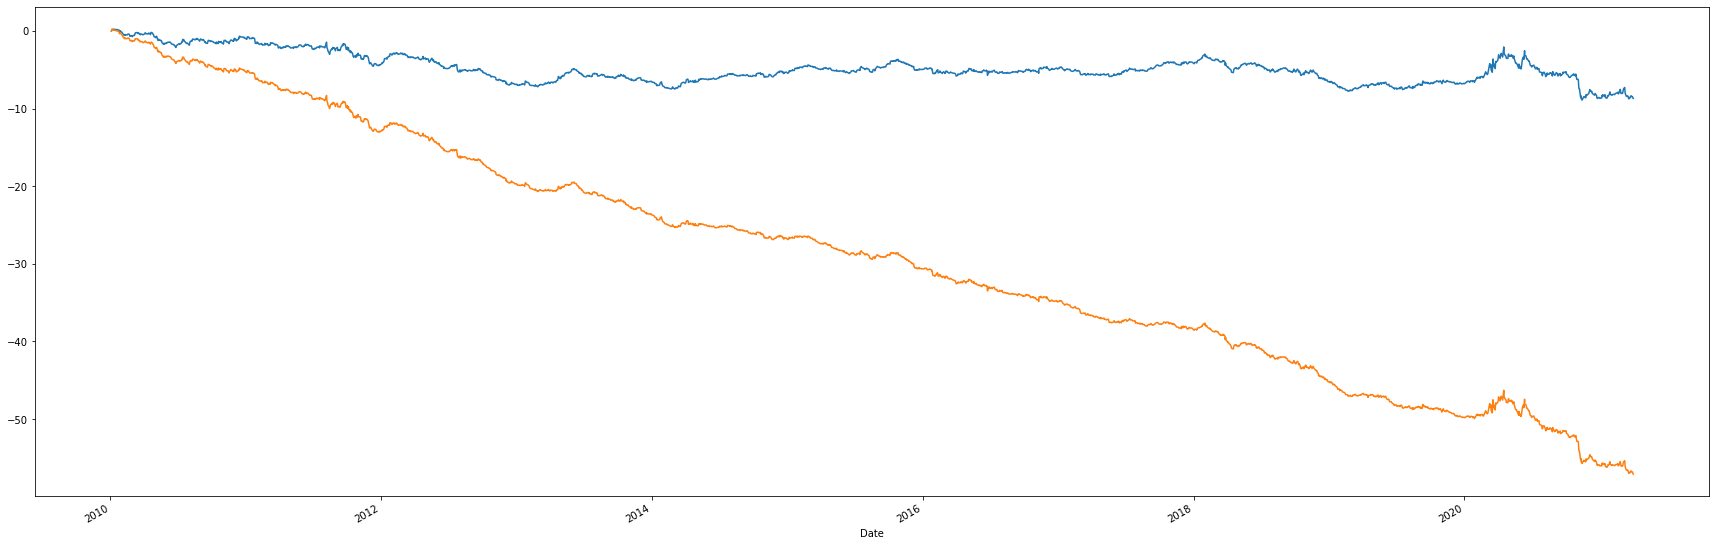

In [30]:
plotting.plot_cumulative_pnl()